**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Read In CSV File**

In [ ]:
cs105_survey = pd.read_csv("Clean data CS105 Winter'26 Mini-Project Survey (Responses) 2.csv")
pd.set_option('display.max_columns', None)

Index(['Clean data CS105 Winter'26 Mini-Project Survey (Responses)'], dtype='object')

**Heat Map**

ValueError: zero-size array to reduction operation fmin which has no identity

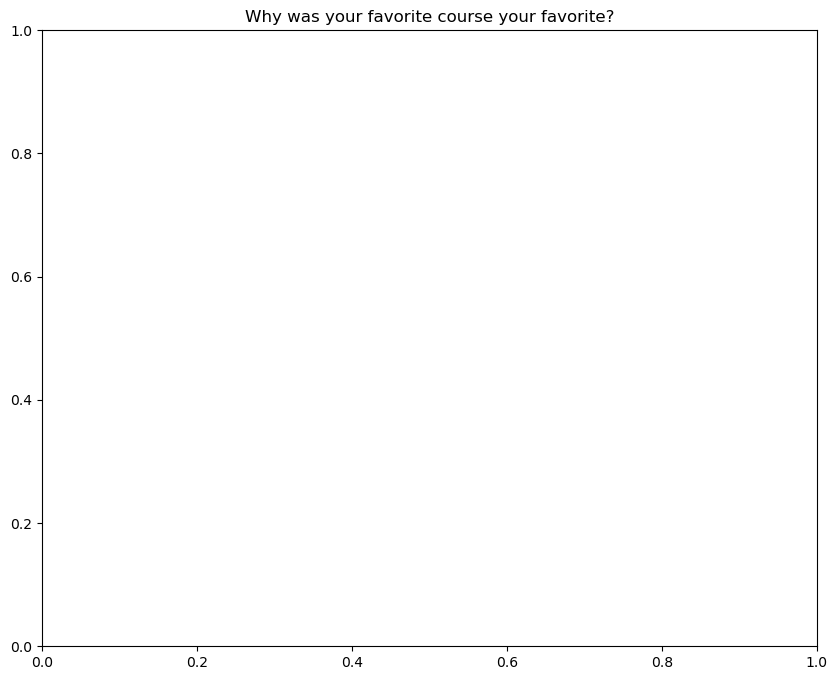

In [ ]:
favorite_course = cs105_survey.loc[:, 
                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Final project instead of exam]":
                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Prepares for future job]"
            ].copy()

favorite_course = favorite_course.rename(columns={"Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Final project instead of exam]":"Final project instead of exam",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Easy exams]":"Easy exams",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Friendly professor]":"Friendly prof",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Accessible office hours]":"Accessible office hours",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Low workload]":"Low workload",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [No required attendence]":"No required attendence",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Interested in material]":"Interested in material",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Prepares for future job]":"Prepares for future job"})

favorite_course = favorite_course.apply(pd.Series.value_counts, args=(1, 2)) * 100 

plt.figure(figsize=(10, 8))
plt.title("Why was your favorite course your favorite?")
sns.heatmap(data=favorite_course, center=0, cmap="crest", annot=True, square=True, linewidths=1, cbar_kws={"label":"Percentage"})
plt.show()


We can see from the data that the features that were most "hot" for answering the question "Why was your favorite course your favorite?" were having a Friendly Prof and being interested in the material. The features that were least correlated were "final project" over exam and "no required attendence".

**Parallel Coordinate Plot**

<Axes: >

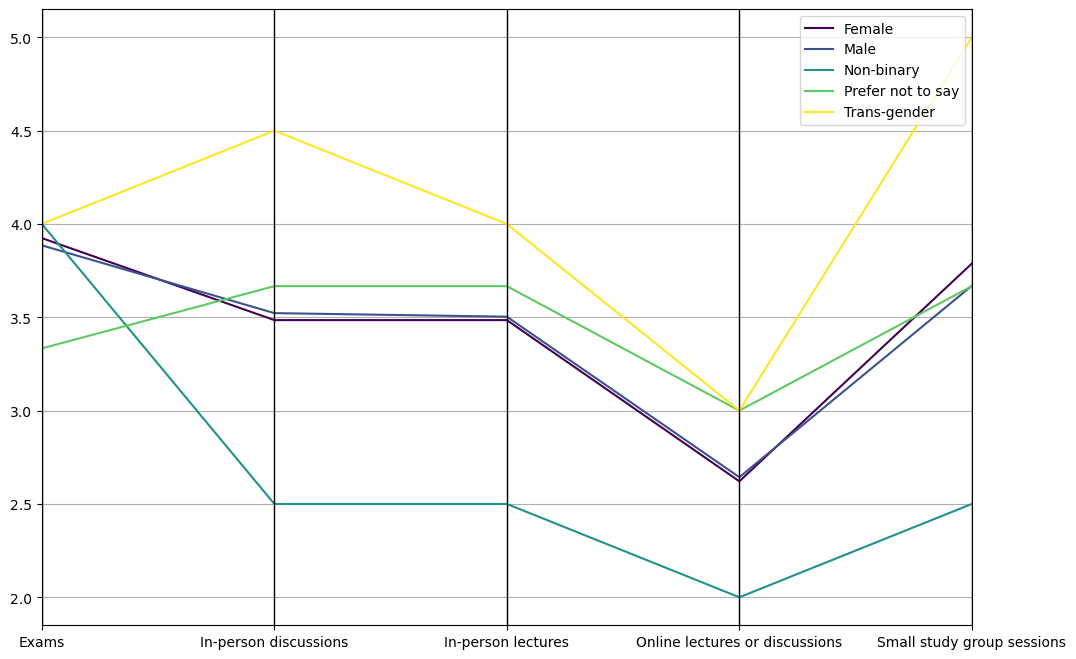

In [ ]:
identity_concentration = cs105_survey.iloc[:, 13:18].copy()
identity_concentration["Identity"] = cs105_survey["What gender do you identify as?"]

identity_concentration = identity_concentration.rename(columns={identity_concentration.columns[0]:"In-person lectures",
                                                                identity_concentration.columns[1]:"In-person discussions",
                                                                identity_concentration.columns[2]:"Online lectures or discussions",
                                                                identity_concentration.columns[3]:"Small study group sessions",
                                                                identity_concentration.columns[4]:"Exams"})

identity_concentration_pivot = pd.pivot_table(data=identity_concentration, values=identity_concentration.loc[:, "In-person lectures":"Exams"], index="Identity", aggfunc="mean")
identity_concentration_pivot["Classes"] = identity_concentration_pivot.index

plt.figure(figsize=(12, 8))
pd.plotting.parallel_coordinates(identity_concentration_pivot, "Classes", colormap='viridis', alpha=1.0)
plt.xlabel('Events', fontsize=12)
plt.ylabel('Concentration Mean', fontsize=12)
plt.legend(title='Concentration and Gender', loc='upper right')
plt.show()